# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.


Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64')
from ddpg_agent import Agent
brain_name = env.brain_names[0]
num_agents =1
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

brain = env.brains[brain_name]
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)
print("episode done ",env_info.local_done)
# examine the state space 
state = env_info.vector_observations
state_size = state.shape[1]
agent = Agent(state_size=state_size, action_size=action_size, random_seed=3)
#agent.actor_local
agent.reset()
agent.critic_local.eval()
agent.actor_local.eval()
print(torch.load("checkpoint_critic_temp.pth", map_location=lambda storage, loc: storage).keys())
agent.critic_local.load_state_dict(torch.load("checkpoint_critic.pth"))
agent.actor_local.load_state_dict(torch.load("checkpoint_actor.pth"))
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    #print(rewards)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    state = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)),scores)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Size of each action: 4
episode done  [False]
odict_keys(['normalizer.weight', 'normalizer.bias', 'normalizer.running_mean', 'normalizer.running_var', 'normalizer.num_batches_tracked', 'layers.0.weight', 'layers.0.bias', 'layers.1.weight', 'layers.1.bias', 'output.weight', 'output.bias'])


/home_01/f20150198/miniconda2/envs/python3/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode: 30.58999931626022 [30.58999932]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Size of each action: 4
episode done  [False]
hello
avg score 38.629999136552215
Episode 1	Average Score: 38.62999914[38.629999136552215]


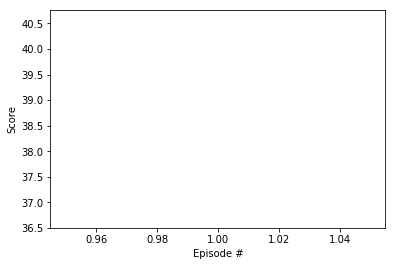

<Figure size 432x288 with 0 Axes>

In [2]:
from collections import deque
from ddpg_agent import Agent
from unityagents import UnityEnvironment
import torch
import matplotlib.pyplot as plt
import numpy as np
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)
print("episode done ",env_info.local_done)
# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
agent = Agent(state_size=state_size, action_size=action_size, random_seed=3)
agent.critic_local.load_state_dict(torch.load("checkpoint_critic.pth"))
agent.actor_local.load_state_dict(torch.load("checkpoint_actor.pth"))
#scores = np.zeros(1)                          # initialize the score (for each agent)
print("hello")
def ddpg(n_episodes=5000, max_t=2000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        #/print("mello")
        agent.reset()
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment
        #print("kello")
        state = env_info.vector_observations                 # get the current state (for each agent)
        score = np.zeros(1)
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_state = env_info.vector_observations         # get next state (for each agent)
            reward = env_info.rewards                        # get reward (for each agent)
            done = env_info.local_done                        # see if episode finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done[0]:
                break
        avg_score = np.mean(score)
        print("avg score",avg_score)
        scores_deque.append(avg_score)
        scores.append(avg_score)
        print('\rEpisode {}\tAverage Score: {:.8f}'.format(i_episode, np.mean(scores_deque)), end="")
        if np.mean(scores_deque) >= 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_temp.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_temp.pth')
            break
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            `
    return scores

scores = ddpg()
fig = plt.figure()
ax = fig.add_subplot(111)
print(scores)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
plt.savefig("graph.png")

In [ ]:
!less log.out

Found path: /home_01/f20150198/projects/deep-reinforcement-learning/p2_continuou s-control/Reacher_Linux_NoVis/Reacher.x86_64
Mono path[0] = '/home_01/f20150198/projects/deep-reinforcement-learning/p2_conti nuous-control/Reacher_Linux_NoVis/Reacher_Data/Managed'
Mono config path = '/home_01/f20150198/projects/deep-reinforcement-learning/p2_c ontinuous-control/Reacher_Linux_NoVis/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
        libgrpc_csharp_ext.x86.so
Logging to /home_01/f20150198/.config/unity3d/Unity Technologies/Unity Environme nt/Player.log
Size of each action: 4
episode done  [False]
hello
^MEpisode 1     Average Score: 0.00000000^MEpisode 2    Average Score: 0.0000000 0^MEpisode 3    Average Score: 0.41666666^MEpisode 4    Average Score: 0.4374999 9^MEpisode 5    Average Score: 0.34999999^MEpisode 6    Average Score: 0.3816666 6^MEpisode 7    Average Score: 0.43999999^MEpisode 8    Average Score: 0.4

![title](graph.png)

In [ ]:
env.close()


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```